# KFOLD Validation Technique

**K-Fold is a `model validation` technique which is used to divide the data into k equal folds (parts)**<br>
**Every k fold:**<br>
*1. k-1 folds = training data*<br>
*2. 1 fold = testing data*<br>
*This process repeats k times `every fold` becomes test once*<br>

**Why k fold:**<br>
*1. every data points become test data once*<br>
*2. for Model's reliable & stable accuracy*<br>
*3. better for overfitting*

# Grid Search

**Grid search is a hyperparameter tuning technique**<br>
*Example:*<br>
*param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}*<br>
*total combinations try 4 x 2=8*<br>
**Try to find the best Parameters**<br>

### imbalanced-learn library used to provide ways to perform `Oversampling` ,`Undersampling` and `Smote`
### to install from comand prompt type  `pip install imbalanced-learn`

# Example for Samplings

In [1]:
# importing the Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold # for model validation
from sklearn.model_selection import GridSearchCV # for hyperparameter tuning and searching
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report  # Model Evaluation

In [2]:
# Data Loading and Analysis
df=pd.read_csv(r"C:\Users\talib\Downloads\creditcard.csv")

In [3]:
# Data shape
df.shape

(284807, 31)

In [4]:
# First 5 Records
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# Checking if there is any Null values
df.isnull().sum()

# No Null Values are there in the data

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# Target Variable is 'Class'
# Count of the 0 and 1
df['Class'].value_counts()

# Here we can see that 0 is much more higher than 1 that means if we train on this data this will lead to 'Overfitting' of the data
# Means it will learn one pattern mostly

Class
0    284315
1       492
Name: count, dtype: int64

In [8]:
# Splitting the Data
X=df.drop(columns='Class',axis=1)
y=df['Class']

In [9]:
print(X)
print(y)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V20       V21  \
0       0.462388  0.239599  0.098698  0.363787  ...  0.25141

In [10]:
print(X.shape)
print(y.shape)

(284807, 30)
(284807,)


# Data Visualization

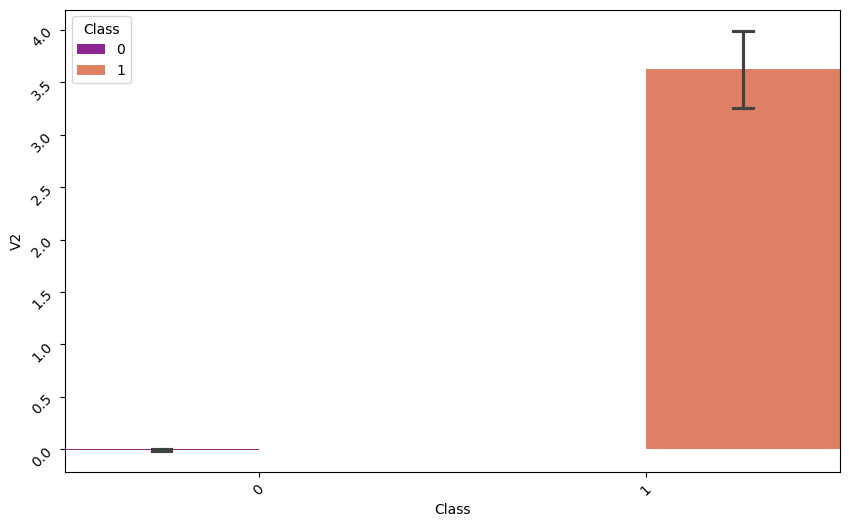

In [11]:

plt.figure(figsize=(10,6))
sns.barplot(x=df['Class'],y=df['V2'],data=df,hue=df['Class'],palette="plasma",estimator="mean",dodge=True,saturation=0.8,width=1,capsize=0.1)

plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

<Axes: >

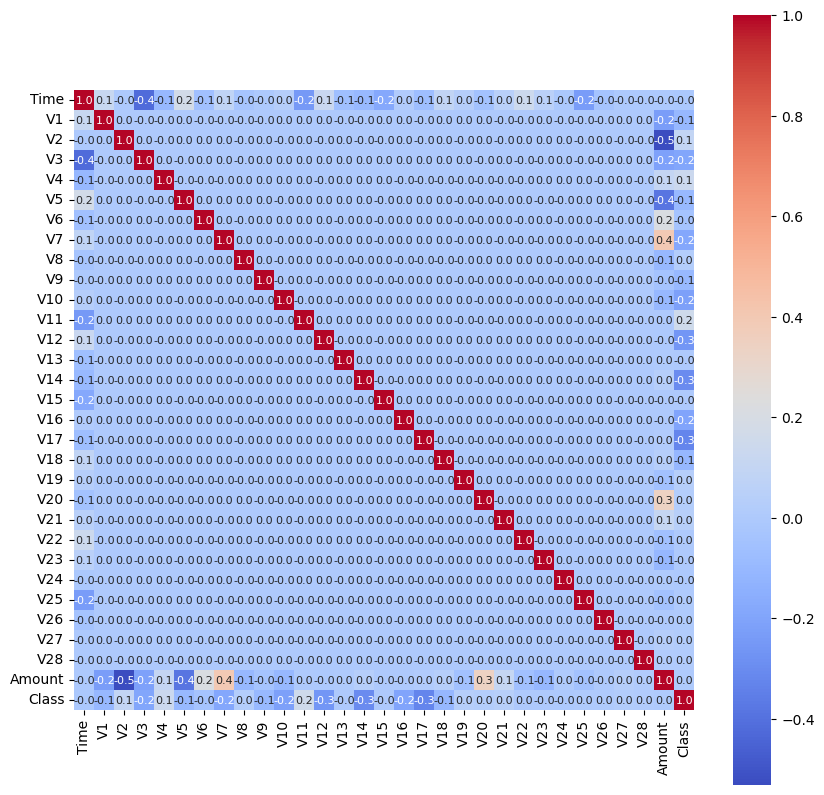

In [12]:
# Correlation plot
corr=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,cmap="coolwarm",fmt=".1f",annot=True,cbar=True,annot_kws={"size":8},square=True)

C:\Users\talib\AppData\Local\Temp\ipykernel_26204\297029327.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Class',data=df,kind="count",palette="viridis")


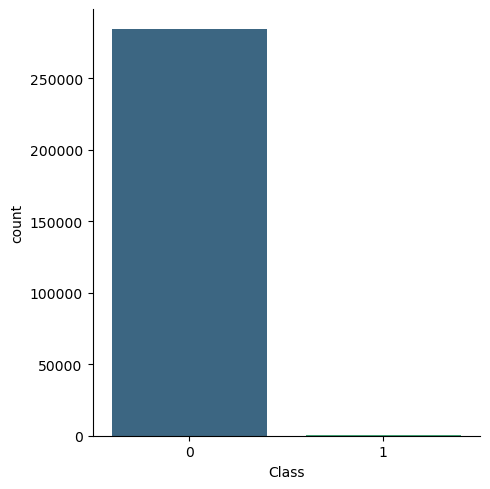

In [13]:
sns.catplot(x='Class',data=df,kind="count",palette="viridis")

In [14]:
# model object 7 data splitting
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

# Logistic Regression

In [15]:

lr=LogisticRegression()

# grid hyperparameter
grid={'C':10.0**np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

# Grid Search CV
gd=GridSearchCV(lr,grid,cv=cv,n_jobs=-1,scoring='f1_macro')

# Trainig 
gd.fit(X_train,y_train)

C:\Users\talib\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\talib\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\talib\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\talib\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1193, in fit
    solver = _

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [16]:
# Model Prediction or Evaluation
y_pred=gd.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Prediction:\n",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
      

[[85266    41]
 [   58    78]]
Accuracy Prediction:
 0.9988413328183702
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.66      0.57      0.61       136

    accuracy                           1.00     85443
   macro avg       0.83      0.79      0.81     85443
weighted avg       1.00      1.00      1.00     85443



# Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Model object
rfc=RandomForestClassifier()

# Model traning 
rfc.fit(X_train,y_train)

# Model Prediction and Evaluation
y_pred=rfc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy:\n",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85302     5]
 [   32   104]]
Accuracy:
 0.9995669627705019
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.95      0.76      0.85       136

    accuracy                           1.00     85443
   macro avg       0.98      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [19]:
# with weight assigned parameter
weight_class=dict({0:1,1:1500})
# Model object
rfc=RandomForestClassifier(class_weight=weight_class)

# Model traning 
rfc.fit(X_train,y_train)

# Model Prediction and Evaluation
y_pred=rfc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy:\n",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85303     4]
 [   30   106]]
Accuracy:
 0.999602073897218
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.96      0.78      0.86       136

    accuracy                           1.00     85443
   macro avg       0.98      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



# UnderSampling
**Reducing the data**

In [22]:
# to count the training and testing data
from collections import Counter
from imblearn.under_sampling import NearMiss
ns=NearMiss(sampling_strategy=0.8)

X_train_ns,y_train_ns=ns.fit_resample(X_train,y_train)
print(f'Number of classes before Fit:{Counter(y_train)}')
print(f'Number of classes after fit :{Counter(y_train_ns)}')

Number of classes before Fit:Counter({0: 199008, 1: 356})
Number of classes after fit :Counter({0: 445, 1: 356})


In [23]:
# Model Training Random Forest Classifier After UnderSampling Performance
rfc=RandomForestClassifier()

# Model traning 
rfc.fit(X_train_ns,y_train_ns)

# Model Prediction and Evaluation
y_pred=rfc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy:\n",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[58794 26513]
 [    7   129]]
Accuracy:
 0.6896176398300622
              precision    recall  f1-score   support

           0       1.00      0.69      0.82     85307
           1       0.00      0.95      0.01       136

    accuracy                           0.69     85443
   macro avg       0.50      0.82      0.41     85443
weighted avg       1.00      0.69      0.81     85443



# OverSampling
**Increase the Sample of the minority data set**

In [25]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
# object 
os=RandomOverSampler()

X_train_os,y_train_os=os.fit_resample(X_train,y_train)
print(f'Number of classes  before fit:{Counter(y_train)}')
print(f'Number of classes after fit:{Counter(y_train_os)}')

Number of classes  before fit:Counter({0: 199008, 1: 356})
Number of classes after fit:Counter({0: 199008, 1: 199008})


In [27]:
# Model Training Random Forest Classifier After UnderSampling Performance
rfc=RandomForestClassifier()

# Model traning 
rfc.fit(X_train_os,y_train_os)

# Model Prediction and Evaluation
y_pred=rfc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy:\n",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85301     6]
 [   24   112]]
Accuracy:
 0.9996488887328394
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.95      0.82      0.88       136

    accuracy                           1.00     85443
   macro avg       0.97      0.91      0.94     85443
weighted avg       1.00      1.00      1.00     85443



In [28]:
# Reject Logisic Regression model
# Model Training Random Forest Classifier After UnderSampling Performance
lg=LogisticRegression()

# Model traning 
lg.fit(X_train_os,y_train_os)

# Model Prediction and Evaluation
y_pred=lg.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy:\n",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[82226  3081]
 [   12   124]]
Accuracy:
 0.963800428355746
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85307
           1       0.04      0.91      0.07       136

    accuracy                           0.96     85443
   macro avg       0.52      0.94      0.53     85443
weighted avg       1.00      0.96      0.98     85443



C:\Users\talib\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Smoting Technique for Sampling -- it balance the under and over sampling

In [32]:
from imblearn.combine import SMOTETomek
smot=SMOTETomek(sampling_strategy=0.5)

# Resample
X_train_smote,y_train_smote=smot.fit_resample(X_train,y_train)

print(f'Number of classes before fit:{Counter(y_train)}')
print(f'Number of classes after fit:{Counter(y_train_smote)}')

Number of classes before fit:Counter({0: 199008, 1: 356})
Number of classes after fit:Counter({0: 198215, 1: 98711})


In [33]:
# Model Training Random Forest Classifier After UnderSampling Performance
rfc=RandomForestClassifier()

# Model traning 
rfc.fit(X_train_smote,y_train_smote)

# Model Prediction and Evaluation
y_pred=rfc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy:\n",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85285    22]
 [   18   118]]
Accuracy:
 0.9995318516437859
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.84      0.87      0.86       136

    accuracy                           1.00     85443
   macro avg       0.92      0.93      0.93     85443
weighted avg       1.00      1.00      1.00     85443

